# Cluster Analysis Basics

## Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.cluster import KMeans

sns.set()

## Importing Data

In [5]:
data = pd.read_csv("../Datasets/3.01.Country clusters.csv")
data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


(-180.0, 180.0)

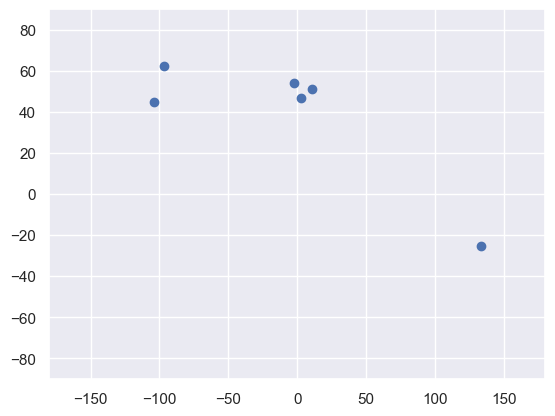

In [7]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.ylim(-90,90)
plt.xlim(-180,180)

### Selecting Features

In [9]:
x = data.iloc[:, 1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


### Clustering

In [13]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [14]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1])

In [15]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


(-180.0, 180.0)

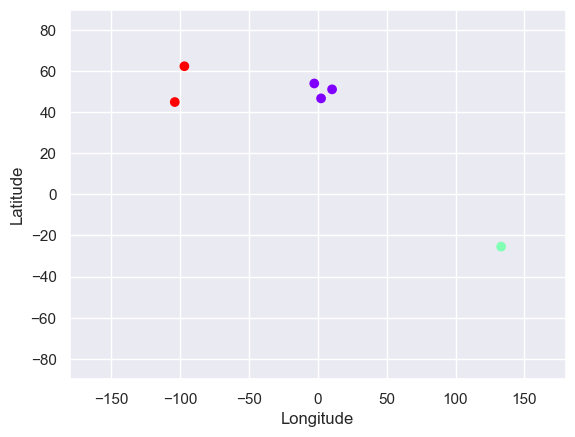

In [ ]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c = data_with_clusters['Cluster'], cmap = "rainbow")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.ylim(-90,90)
plt.xlim(-180,180)

#### Language Clustering

In [49]:
data_mapped = data.copy()

data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'French':1, 'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [50]:
x = data_mapped.iloc[:, 3:4]

kmeans = KMeans(3)

kmeans.fit(x)

identified_clusters = kmeans.fit_predict(x)
identified_clusters

data_with_clusters = data_mapped.copy()

data_with_clusters['Language Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Language Cluster
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,2
5,Australia,-25.45,133.11,0,1


Text(0, 0.5, 'Latitude')

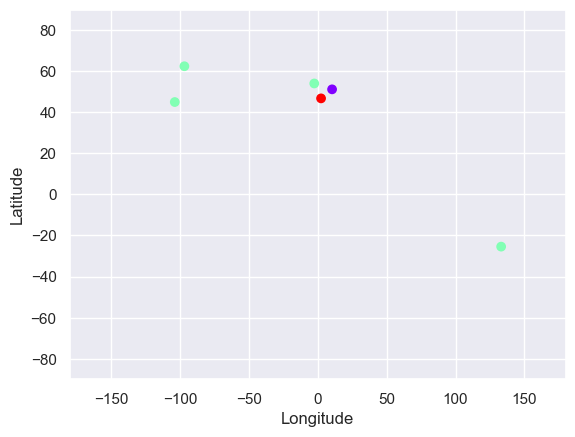

In [45]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c = data_with_clusters['Language Cluster'], cmap = 'rainbow')
plt.ylim(-90, 90)
plt.xlim(-180,180)

plt.xlabel('Longitude')
plt.ylabel('Latitude')

### WCSS

In [59]:
x = data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [60]:
wcss = []

for i in range(1, len(data['Country'].unique()) + 1):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

wcss

[42605.41356666667,
 13208.958119999996,
 290.1052333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

#### Plotting WCSS

Text(0, 0.5, 'WCSS')

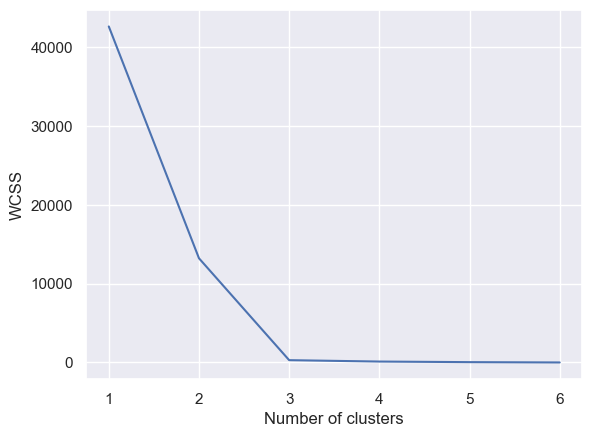

In [63]:
num_of_clusters = range(1, len(wcss) + 1)
plt.plot(num_of_clusters, wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")